In [61]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [44]:
luminescence_means = "../../../../data/luminescence/to_be_sorted/24.11.19/output_means.csv"
luminescence_raw = "../../../../data/luminescence/to_be_sorted/24.11.19/output_raw.csv"

In [45]:
luminescence_means_df = pd.read_csv(luminescence_means, header=0)
luminescence_raw_df = pd.read_csv(luminescence_raw, header=0)

In [46]:
luminescence_means_df

,name,condition,mean_luminescence,standard_error,date
0,25+72,100mM nitrate_2hrs_morning,2.790261,2.193078,24.11.19
1,25+72,100mM nitrate_overnight,1.590474,0.172189,24.11.19
2,25+72,nitrate_free,0.550167,0.222781,24.11.19
3,35+72,100mM nitrate_2hrs_morning,52.739306,11.566316,24.11.19
4,35+72,100mM nitrate_overnight,34.324808,5.507199,24.11.19
5,35+72,nitrate_free,39.059989,4.871612,24.11.19
6,36+72,100mM nitrate_2hrs_morning,7.455392,6.533360,24.11.19
7,36+72,100mM nitrate_overnight,14.478988,8.061074,24.11.19
8,36+72,nitrate_free,2.743449,0.756559,24.11.19
9,71 + 72,100mM nitrate_2hrs_morning,81.671569,7.348306,24.11.19


In [47]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date
0,A,1,Sample X1,394917.0,46763438.0,71 + 72,nitrate_free,118.413332,24.11.19
1,A,2,Sample X6,125696.0,5237032.0,71 + 72,nitrate_free,41.664269,24.11.19
2,A,3,Sample X11,64547.0,2986951.0,71 + 72,nitrate_free,46.275598,24.11.19
3,A,4,Sample X16,95437.0,8127891.0,71 + 72,100mM nitrate_2hrs_morning,85.164988,24.11.19
4,A,5,Sample X21,118307.0,10918281.0,71 + 72,100mM nitrate_2hrs_morning,92.287701,24.11.19
5,A,6,Sample X26,71519.0,4831968.0,71 + 72,100mM nitrate_2hrs_morning,67.562018,24.11.19
6,A,7,Sample X31,84739.0,2670521.0,71 + 72,100mM nitrate_overnight,31.514663,24.11.19
7,A,8,Sample X36,114046.0,3483421.0,71 + 72,100mM nitrate_overnight,30.544000,24.11.19
8,A,9,Sample X41,74478.0,3478982.0,71 + 72,100mM nitrate_overnight,46.711539,24.11.19
9,B,1,Sample X2,188045.0,51186.0,25+72,nitrate_free,0.272201,24.11.19


In [48]:
#add promoter names column
luminescence_raw_df['Promoter'] = luminescence_raw_df.name 

In [49]:
luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'

In [50]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter
0,A,1,Sample X1,394917.0,46763438.0,71 + 72,nitrate_free,118.413332,24.11.19,UBQ10
1,A,2,Sample X6,125696.0,5237032.0,71 + 72,nitrate_free,41.664269,24.11.19,UBQ10
2,A,3,Sample X11,64547.0,2986951.0,71 + 72,nitrate_free,46.275598,24.11.19,UBQ10
3,A,4,Sample X16,95437.0,8127891.0,71 + 72,100mM nitrate_2hrs_morning,85.164988,24.11.19,UBQ10
4,A,5,Sample X21,118307.0,10918281.0,71 + 72,100mM nitrate_2hrs_morning,92.287701,24.11.19,UBQ10
5,A,6,Sample X26,71519.0,4831968.0,71 + 72,100mM nitrate_2hrs_morning,67.562018,24.11.19,UBQ10
6,A,7,Sample X31,84739.0,2670521.0,71 + 72,100mM nitrate_overnight,31.514663,24.11.19,UBQ10
7,A,8,Sample X36,114046.0,3483421.0,71 + 72,100mM nitrate_overnight,30.544000,24.11.19,UBQ10
8,A,9,Sample X41,74478.0,3478982.0,71 + 72,100mM nitrate_overnight,46.711539,24.11.19,UBQ10
9,B,1,Sample X2,188045.0,51186.0,25+72,nitrate_free,0.272201,24.11.19,NIR1


In [51]:
#set style to ticks
sns.set(style="ticks", color_codes=True)

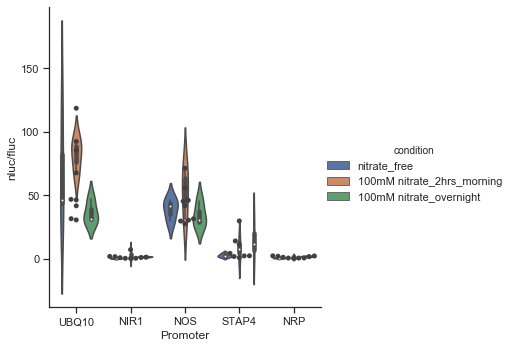

In [52]:
plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin')
#plot points
ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25").get_figure().savefig('../../../../data/plots/luminescence/24.11.19/luminescence_violin.pdf', format='pdf')

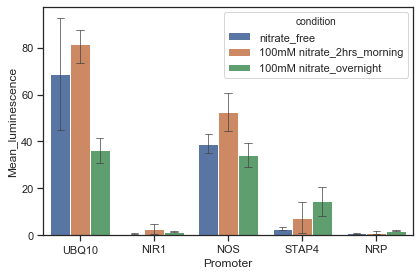

In [62]:
#bar chart, 68% confidence intervals (1 Standard error)
plot = sns.barplot(x="Promoter", y="nluc/fluc", hue="condition", data=luminescence_raw_df, ci=68, capsize=0.1,errwidth=0.7)
plt.ylabel("Mean_luminescence").get_figure().savefig('../../../../data/plots/luminescence/24.11.19/promoter_luminescence.pdf', format='pdf')

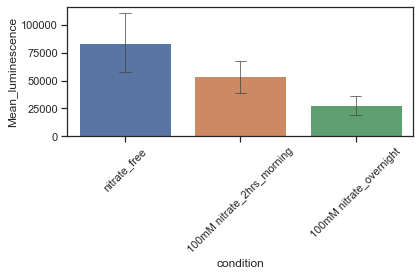

In [63]:
#plot raw UBQ10
plot = sns.barplot(x="condition", y="fluc_luminescence", data=luminescence_raw_df,ci=68,capsize=0.1,errwidth=0.7)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_luminescence").get_figure().savefig('../../../../data/plots/luminescence/24.11.19/UBQ10fluc_raw.pdf', format='pdf')

### get names of each condition for later

In [55]:
pd.Categorical(luminescence_raw_df.condition)
names = luminescence_raw_df.condition.unique()
for name in names:
    print(name)

nitrate_free
100mM nitrate_2hrs_morning
100mM nitrate_overnight


In [56]:
#get list of promoters
pd.Categorical(luminescence_raw_df.Promoter)
prom_names = luminescence_raw_df.Promoter.unique()
for name in prom_names:
    print(name)

UBQ10
NIR1
NOS
STAP4
NRP


### test normality

In [57]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print('{}: {}'.format(name, stats.shapiro(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == name])))


nitrate_free: (0.7033216953277588, 0.0002697518502827734)
100mM nitrate_2hrs_morning: (0.7973607182502747, 0.00463036959990859)
100mM nitrate_overnight: (0.8101227879524231, 0.004972793627530336)
nitrate_free: (0.7033216953277588, 0.0002697518502827734)
100mM nitrate_2hrs_morning: (0.7973607182502747, 0.00463036959990859)
100mM nitrate_overnight: (0.8101227879524231, 0.004972793627530336)
nitrate_free: (0.7033216953277588, 0.0002697518502827734)
100mM nitrate_2hrs_morning: (0.7973607182502747, 0.00463036959990859)
100mM nitrate_overnight: (0.8101227879524231, 0.004972793627530336)
nitrate_free: (0.7033216953277588, 0.0002697518502827734)
100mM nitrate_2hrs_morning: (0.7973607182502747, 0.00463036959990859)
100mM nitrate_overnight: (0.8101227879524231, 0.004972793627530336)
nitrate_free: (0.7033216953277588, 0.0002697518502827734)
100mM nitrate_2hrs_morning: (0.7973607182502747, 0.00463036959990859)
100mM nitrate_overnight: (0.8101227879524231, 0.004972793627530336)


#### not normal

In [58]:
#test variance
stats.levene(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[0]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[1]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[2]])

LeveneResult(statistic=1.062946050685294, pvalue=0.35476288428714914)

In [59]:
test = luminescence_raw_df.groupby('Promoter')['nluc/fluc'].apply

In [78]:
test

<bound method SeriesGroupBy.apply of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fc8486a1160>>